In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [144]:
#load data
dt_train=pd.read_csv(r'/content/train.csv')
dt_test=pd.read_csv(r'/content/test.csv')

<ipython-input-144-c84057423c9a>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  dt_train=pd.read_csv(r'/content/train.csv')


In [145]:
dt_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [146]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# data have problems in data types so we need to handle that
 And
# the test data file does not include the target column Credit_score
#so we will ignore it and we will work only with training set as train and test



In [147]:
dt_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [148]:
# df = pd.concat([dt_train,dt_test])


In [149]:
dt_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [150]:
#check if there any duplicate
dt_train.duplicated().sum()

0

In [151]:
# function to know number and percentage of null values in each column
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(dt_train)



,Missing_Number,Missing_Percent
Monthly_Inhand_Salary,15002,0.15002
Type_of_Loan,11408,0.11408
Name,9985,0.09985
Credit_History_Age,9030,0.09030
Num_of_Delayed_Payment,7002,0.07002
Amount_invested_monthly,4479,0.04479
Num_Credit_Inquiries,1965,0.01965
Monthly_Balance,1200,0.01200
ID,0,0.00000
Changed_Credit_Limit,0,0.00000


# **as we see the data include alot of null values so we need to clean the data**




In [152]:
#get numerical columns
numerical= dt_train.select_dtypes('number').columns
# get categorical columns
categorical = dt_train.select_dtypes('object').columns

print(f'Numerical Columns:  {dt_train[numerical].columns}')
print('\n')
print(f'Categorical Columns: {dt_train[categorical].columns}')

Numerical Columns:  Index(['Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Delay_from_due_date', 'Num_Credit_Inquiries',
       'Credit_Utilization_Ratio', 'Total_EMI_per_month'],
      dtype='object')


Categorical Columns: Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


# The dataset contains a mix of numerical and categorical columns but some of categorical columns like Age and monthly_Balance should be numerical

In [153]:
print('Credit_Mix',dt_train['Credit_Mix'].unique())
print('Credit_Score',dt_train['Credit_Score'].unique())
print('Payment_Behaviour',dt_train['Payment_Behaviour'].unique())
print('Payment_of_Min_Amount',dt_train['Payment_of_Min_Amount'].unique())
print('Occupation', dt_train['Occupation'].unique())

Credit_Mix ['_' 'Good' 'Standard' 'Bad']
Credit_Score ['Good' 'Standard' 'Poor']
Payment_Behaviour ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_value_payments']
Payment_of_Min_Amount ['No' 'NM' 'Yes']
Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


# we need to look deeply inside every column
#because we see here some noise in columns values like '','_____','!@9#%8'  
# before we feed data to the model we need to make sure everything is alright

# # **Data Cleaning**

# **before visualize data let's do some cleaning for every column**

# **Age**




In [154]:
#removing non-numeric characters
dt_train['Age'] = dt_train['Age'].str.replace('_', '', regex=True)

# Convert 'age' column to int, using errors='coerce' to handle any remaining problematic entries
dt_train['Age'] = pd.to_numeric(dt_train['Age'], errors='coerce')
dt_train['Age'] = dt_train['Age'].astype(int)



# get out of range values

In [155]:
# print(dt_train['Age'].unique())

# #  out-of-range values
# out_of_range = ~((dt_train['Age'] >= 0) & (dt_train['Age'] <= 110))

# #frequency of out-of-range values
# out_frequency = dt_train.loc[out_of_range, 'Age'].value_counts()
# print(out_frequency)


In [156]:
# correct_ages = (dt_train['Age'] >= 0) & (dt_train['Age']<= 110)

# # Calculate the mean age of valid ages
# mean_age = dt_train.loc[correct_ages, 'Age'].mean()

# # Replace invalid age values with the mean age
# dt_train['Age'] = np.where(correct_ages, dt_train['Age'], mean_age)
# dt_train['Age'] = dt_train['Age'].astype(int)

# print(dt_train['Age'].unique())


# the frequency in value 33 highly increased because the mean is 33 if we continue on this the model will have bias in this situation

In [157]:
# plt.figure(figsize=(15, 7))
# sns.countplot(x='Age', data=dt_train)
# plt.title('Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()


# **correct way for handling null values without change in age distribution**
we will use Random Sampling technique

In [158]:
#get correct ages
correct_ages = (dt_train['Age'] >= 0) & (dt_train['Age']<= 110)

valid_ages = dt_train.loc[correct_ages, 'Age']

num_invalid_ages = (~correct_ages).sum()

# replace invalid ages with random samples from valid ages
dt_train.loc[~correct_ages, 'Age'] = np.random.choice(valid_ages, size=num_invalid_ages, replace=True)
#change the type of age to be int
dt_train['Age'] = dt_train['Age'].astype(int)

print(dt_train['Age'].unique())



[ 23  30  28  34  54  55  21  31  33  40  24  44  45  41  32  35  36  39
  38  37  20  46  26  42  19  48  43  22  16  18  15  27  25  14  17  47
  53  56  29  50  49  51  52  99 100 102  95 109]


# now we have agood distribution

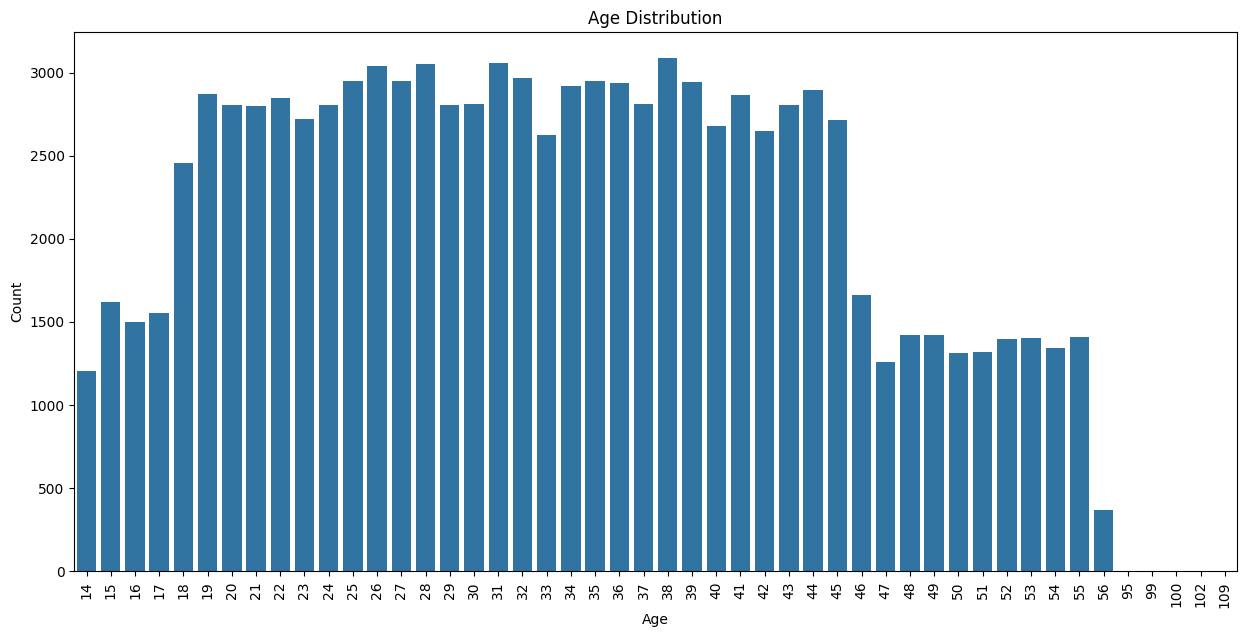

In [159]:
plt.figure(figsize=(15, 7))
sns.countplot(x='Age', data=dt_train)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **Occupation**



In [160]:
print('Occupation', dt_train['Occupation'].unique())

Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


handle '_______' case

In [161]:
#replace "_______" with  "Other"
dt_train["Occupation"] = dt_train["Occupation"].str.replace("_______" , "Other")


print('Occupation', dt_train['Occupation'].unique())

Occupation ['Scientist' 'Other' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']


# **Annual_Income**

In [162]:
#removing non-numeric characters
dt_train["Annual_Income"] = dt_train["Annual_Income"].str.replace("_","")

#convert Annual_Income data type to be float
dt_train["Annual_Income"] = dt_train["Annual_Income"].astype(float)

# **Monthly_Inhand_Salary**

In [163]:
# count null values
print('total null values is :',dt_train['Monthly_Inhand_Salary'].isnull().sum())

total null values is : 15002


In [164]:
# replace null values with 'Annual_Income'] / 12
dt_train['Monthly_Inhand_Salary'] = dt_train['Monthly_Inhand_Salary'].fillna(dt_train['Annual_Income'] / 12)

# check if there any null values remain
dt_train['Monthly_Inhand_Salary'].isnull().sum()

0

# **Num_of_Loan**

In [165]:
#count null values
print('total null values is :',dt_train['Num_of_Loan'].isnull().sum())

#get unique values
print(dt_train['Num_of_Loan'].unique())

#removing non-numeric characters
dt_train['Num_of_Loan'] = dt_train['Num_of_Loan'].str.replace("_","")

#convert Annual_Income data type to be int
dt_train['Num_of_Loan'] = dt_train['Num_of_Loan'].astype(int)

total null values is : 0
['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '455' '55' '1096'
 '1474' '420' '1131' '904' '89' '1259' '527' '1241' '449' '983' '418'
 '319' '23' '238' '638' '138' '235_' '280' '1070' '1484' '274' '494'
 '1459_' '404' '1354' '1495' '1391' '601' '1313' '1319' '898' '231' '752'
 '174' '961' '1046' '834' '284' '43

# **Type_of_loan**

In [166]:
# count null values
print('total null values is :',dt_train['Type_of_Loan'].isnull().sum())

print(dt_train['Type_of_Loan'].value_counts())


total null values is : 11408
Type_of_Loan
Not Specified                                                                                                                         1408
Credit-Builder Loan                                                                                                                   1280
Personal Loan                                                                                                                         1272
Debt Consolidation Loan                                                                                                               1264
Student Loan                                                                                                                          1240
                                                                                                                                      ... 
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                    

In [167]:
#replace null values with UnKnown
dt_train['Type_of_Loan'] = dt_train['Type_of_Loan'].fillna("UnKnown")


# **monthly_Balance**

In [168]:
#count null values
print('total null values is :',dt_train['Monthly_Balance'].isnull().sum())

#remove non-numeric characters and convert to float
dt_train['Monthly_Balance'] = dt_train['Monthly_Balance'].replace('[^0-9.-]', '', regex=True).astype(float)



total null values is : 1200


In [169]:
#Calculate the mean
mean = dt_train['Monthly_Balance'].mean()

#fill nan values with the mean
dt_train['Monthly_Balance'].fillna(mean, inplace=True)

<ipython-input-169-6e51b5bcd73b>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_train['Monthly_Balance'].fillna(mean, inplace=True)


In [170]:
print('mean',mean)

# check null values
print('total null values is :',dt_train['Monthly_Balance'].isnull().sum())


mean -3.0364372469635625e+22
total null values is : 0


In [171]:
print(dt_train['Monthly_Balance'])

0        312.494089
1        284.629162
2        331.209863
3        223.451310
4        341.489231
            ...    
99995    479.866228
99996    496.651610
99997    516.809083
99998    319.164979
99999    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64


# **Num_Credit_Card**

In [172]:
# check null values
print('total null values is :',dt_train['Num_Credit_Card'].isnull().sum())
# data info
print(dt_train['Num_Credit_Card'].info)



total null values is : 0
<bound method Series.info of 0        4
1        4
2        4
3        4
4        4
        ..
99995    6
99996    6
99997    6
99998    6
99999    6
Name: Num_Credit_Card, Length: 100000, dtype: int64>


# **Interest_Rate**

In [173]:
# count null values
print('total null values is :',dt_train['Interest_Rate'].isnull().sum())
# data info
print(dt_train['Interest_Rate'].info)


total null values is : 0
<bound method Series.info of 0           3
1           3
2           3
3           3
4           3
         ... 
99995       7
99996       7
99997    5729
99998       7
99999       7
Name: Interest_Rate, Length: 100000, dtype: int64>


In [174]:
print(dt_train['Interest_Rate'].value_counts())

Interest_Rate
8       5012
5       4979
6       4721
12      4540
10      4540
        ... 
4995       1
1899       1
2120       1
5762       1
5729       1
Name: count, Length: 1750, dtype: int64


Interest rate have outliers

#  **Dealy_from_due_date**

In [175]:
#count null values
print('total null values is :',dt_train['Delay_from_due_date'].isnull().sum())
#data info
print(dt_train['Delay_from_due_date'].info)


total null values is : 0
<bound method Series.info of 0         3
1        -1
2         3
3         5
4         6
         ..
99995    23
99996    18
99997    27
99998    20
99999    18
Name: Delay_from_due_date, Length: 100000, dtype: int64>


# **Num_of_Delayed_Payment**

In [176]:
# count null values
print('total null values is :',dt_train['Num_of_Delayed_Payment'].isnull().sum())
# data info
print(dt_train['Num_of_Delayed_Payment'].info)

# remove any non numerical
dt_train['Num_of_Delayed_Payment'] = dt_train['Num_of_Delayed_Payment'].str.replace("_","").str.replace(" ","").str.replace("-","")

#change Num_of_Delayed_Payment data type to be float
dt_train['Num_of_Delayed_Payment'] = dt_train['Num_of_Delayed_Payment'].astype(float)


total null values is : 7002
<bound method Series.info of 0          7
1        NaN
2          7
3          4
4        NaN
        ... 
99995      7
99996      7
99997      6
99998    NaN
99999      6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: object>


In [177]:
#get mean of column
mean=dt_train['Num_of_Delayed_Payment'].mean()

#fill nan rows with mean
dt_train['Num_of_Delayed_Payment'] = dt_train['Num_of_Delayed_Payment'].fillna(mean)

In [178]:
#change Num_of_Delayed_Payment data type to be int
dt_train['Num_of_Delayed_Payment'] = dt_train['Num_of_Delayed_Payment'].astype(int)

#total null values
print('total null values is :',dt_train['Num_of_Delayed_Payment'].isnull().sum())
#get info
print(dt_train['Num_of_Delayed_Payment'].info)

total null values is : 0
<bound method Series.info of 0         7
1        30
2         7
3         4
4        30
         ..
99995     7
99996     7
99997     6
99998    30
99999     6
Name: Num_of_Delayed_Payment, Length: 100000, dtype: int64>


# **Change_Credit_Limit**

In [179]:
#count null values
print('total null values is :',dt_train['Changed_Credit_Limit'].isnull().sum())

# data info
print(dt_train['Changed_Credit_Limit'].info)



total null values is : 0
<bound method Series.info of 0        11.27
1        11.27
2            _
3         6.27
4        11.27
         ...  
99995     11.5
99996     11.5
99997     11.5
99998     11.5
99999     11.5
Name: Changed_Credit_Limit, Length: 100000, dtype: object>


# we do not have null values here in Changed_Credit_Limit but we have values with _ so we need to replace it with mean or something




In [180]:
#count unique values
print(dt_train['Changed_Credit_Limit'].value_counts())

#change the data type to be numeric instead of categoriel
dt_train['Changed_Credit_Limit'] = pd.to_numeric(dt_train['Changed_Credit_Limit'].replace('_', None), errors='coerce')

# mean of the valid entries
mean_limit = dt_train['Changed_Credit_Limit'].mean()

# replace nan originally '_' with the mean
dt_train['Changed_Credit_Limit'].fillna(mean_limit, inplace=True)

Changed_Credit_Limit
_                     2091
8.22                   133
11.5                   127
11.32                  126
7.35                   121
                      ... 
-1.84                    1
0.8899999999999999       1
28.06                    1
1.5599999999999996       1
21.17                    1
Name: count, Length: 4384, dtype: int64


<ipython-input-180-9d8553cc3820>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_train['Changed_Credit_Limit'].fillna(mean_limit, inplace=True)


In [181]:
print(dt_train['Changed_Credit_Limit'].value_counts())


Changed_Credit_Limit
 10.389025    2091
 8.220000      133
 11.500000     127
 11.320000     126
 7.350000      121
              ... 
 31.560000       1
 32.560000       1
 20.660000       1
-0.720000        1
 21.170000       1
Name: count, Length: 4376, dtype: int64


# **Num_Credites_Inquiries**



In [182]:
#count null values
print('total null values is :',dt_train['Num_Credit_Inquiries'].isnull().sum())

#dtaa info
print(dt_train['Num_Credit_Inquiries'].info)


total null values is : 1965
<bound method Series.info of 0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64>


In [183]:
# replace null values with zero
dt_train['Num_Credit_Inquiries'].fillna(0,inplace =True)

<ipython-input-183-bf36b1a40a48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_train['Num_Credit_Inquiries'].fillna(0,inplace =True)


In [184]:
#check if there null values
print('total null values is :',dt_train['Num_Credit_Inquiries'].isnull().sum())

print(dt_train['Num_Credit_Inquiries'].info)


total null values is : 0
<bound method Series.info of 0        4.0
1        4.0
2        4.0
3        4.0
4        4.0
        ... 
99995    3.0
99996    3.0
99997    3.0
99998    3.0
99999    3.0
Name: Num_Credit_Inquiries, Length: 100000, dtype: float64>


# **Credit_Mix**

# we have in credit_mix 4 categories one of them is _ we can drop all of these rows but if we look we will found huge number of samples almost 20%
# so we have 2 good options
# split them above the 3 remain categories or keep them as **new category** and that we will do.


In [185]:
# count null values
print('total null values is :',dt_train['Credit_Mix'].isnull().sum())

print(dt_train['Credit_Mix'].value_counts())

total null values is : 0
Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64


In [186]:
#replace _ values with UnKnown
dt_train['Credit_Mix'] = dt_train['Credit_Mix'].str.replace("_","UnKnown")

In [187]:
#column after modification
print(dt_train['Credit_Mix'].value_counts())

Credit_Mix
Standard    36479
Good        24337
UnKnown     20195
Bad         18989
Name: count, dtype: int64


# **Outstanding_Debt**

In [188]:
# count null values
print('total null values is :',dt_train['Outstanding_Debt'].isnull().sum())
#unique values
dt_train["Outstanding_Debt"].value_counts()

print(dt_train['Outstanding_Debt'].info)


total null values is : 0
<bound method Series.info of 0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: object>


In [189]:
#remove non numeric characters
dt_train['Outstanding_Debt'] = dt_train['Outstanding_Debt'].str.replace("_","")

#change data type to be float
dt_train['Outstanding_Debt'] = dt_train['Outstanding_Debt'].astype(float)

In [190]:
print(dt_train['Outstanding_Debt'].info)


<bound method Series.info of 0        809.98
1        809.98
2        809.98
3        809.98
4        809.98
          ...  
99995    502.38
99996    502.38
99997    502.38
99998    502.38
99999    502.38
Name: Outstanding_Debt, Length: 100000, dtype: float64>


# **Credit_Utilization_Ratio**

In [191]:
#count null values
print('total null values is :',dt_train['Credit_Utilization_Ratio'].isnull().sum())
#data info
print(dt_train['Credit_Utilization_Ratio'].info)

total null values is : 0
<bound method Series.info of 0        26.822620
1        31.944960
2        28.609352
3        31.377862
4        24.797347
           ...    
99995    34.663572
99996    40.565631
99997    41.255522
99998    33.638208
99999    34.192463
Name: Credit_Utilization_Ratio, Length: 100000, dtype: float64>


# **Credit_History_Age**

In [192]:
#count null values
print('total null values is :',dt_train['Credit_History_Age'].isnull().sum())

#data info
print(dt_train['Credit_History_Age'].info)

total null values is : 9030
<bound method Series.info of 0         22 Years and 1 Months
1                           NaN
2         22 Years and 3 Months
3         22 Years and 4 Months
4         22 Years and 5 Months
                  ...          
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99998     31 Years and 9 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object>


In [193]:
print(dt_train['Credit_History_Age'].value_counts())

Credit_History_Age
15 Years and 11 Months    446
19 Years and 4 Months     445
19 Years and 5 Months     444
17 Years and 11 Months    443
19 Years and 3 Months     441
                         ... 
0 Years and 3 Months       20
0 Years and 2 Months       15
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        2
Name: count, Length: 404, dtype: int64


# We have an issue with values that consist of years and months. We can convert them all to months or all to years; for consistency, we will convert them all to months.

In [194]:
# Convert years and months to total months
def convert_to_months(age_str):
    if pd.isnull(age_str):  # Check for NaN
        return None
    years = 0
    months = 0
    if 'Years' in age_str:
        years = int(age_str.split('Years')[0].strip())
    if 'Months' in age_str:
        months = int(age_str.split('and')[1].split('Months')[0].strip())
    return years * 12 + months

# new column with the total months
dt_train['Credit_History_Age_Months'] = dt_train['Credit_History_Age'].apply(convert_to_months)



In [195]:
#drop the old column
dt_train.drop(columns=['Credit_History_Age'], inplace=True)

#display the updated DataFrame
print(dt_train['Credit_History_Age_Months'].value_counts())

Credit_History_Age_Months
191.0    446
232.0    445
233.0    444
215.0    443
231.0    441
        ... 
3.0       20
2.0       15
403.0     14
404.0     12
1.0        2
Name: count, Length: 404, dtype: int64


In [196]:
#replace non values with zeros
dt_train['Credit_History_Age_Months'].replace( np.nan,0, inplace=True)

<ipython-input-196-20c24f2d41f3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_train['Credit_History_Age_Months'].replace( np.nan,0, inplace=True)


In [197]:
#check if there any non values
print('total null values is :',dt_train['Credit_History_Age_Months'].isnull().sum())

total null values is : 0


# **Payment_of_Min_Amount**

In [198]:
#count null values
print('total null values is :',dt_train['Payment_of_Min_Amount'].isnull().sum())

print(dt_train['Payment_of_Min_Amount'].value_counts())

total null values is : 0
Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


we have NM category we can concat them with No category but we worry about misleading so we keep as independent caregory

# **Total_EMI_per_month**

In [199]:
#count null values
print('total null values is :',dt_train["Total_EMI_per_month"].isnull().sum())

total null values is : 0


In [200]:
print(dt_train["Total_EMI_per_month"].value_counts())

Total_EMI_per_month
0.000000        10613
49.574949           8
73.533361           8
22.960835           8
38.661127           8
                ...  
36408.000000        1
23760.000000        1
24612.000000        1
24325.000000        1
58638.000000        1
Name: count, Length: 14950, dtype: int64


# **Amount_Invested_Monthly**

In [201]:
#count null values
print('total null values is :',dt_train["Amount_invested_monthly"].isnull().sum())

total null values is : 4479


In [202]:
print(dt_train["Amount_invested_monthly"].value_counts())

Amount_invested_monthly
__10000__             4305
0.0                    169
80.41529543900253        1
36.66235139442514        1
89.7384893604547         1
                      ... 
36.541908593249026       1
93.45116318631192        1
140.80972223052834       1
38.73937670100975        1
167.1638651610451        1
Name: count, Length: 91049, dtype: int64


In [203]:
#remove nun numeric characters
dt_train["Amount_invested_monthly"] = dt_train["Amount_invested_monthly"].str.replace("_","")

#cahnge Amount_invested_monthly data type to be float
dt_train["Amount_invested_monthly"] = dt_train["Amount_invested_monthly"].astype(float)

In [204]:
print(dt_train["Amount_invested_monthly"].value_counts())

Amount_invested_monthly
10000.000000    4305
0.000000         169
80.415295          1
36.662351          1
89.738489          1
                ... 
36.541909          1
93.451163          1
140.809722         1
38.739377          1
167.163865         1
Name: count, Length: 91049, dtype: int64


In [205]:
#calculate the mode
mode_value = dt_train["Amount_invested_monthly"].mode()[0]

#replace nan values with the mode
dt_train["Amount_invested_monthly"].fillna(mode_value, inplace=True)

<ipython-input-205-99c2fa7d3b5a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_train["Amount_invested_monthly"].fillna(mode_value, inplace=True)


In [206]:
#chack null values
print('total null values is :',dt_train["Amount_invested_monthly"].isnull().sum())

total null values is : 0


# **Payment_Behavior**

In [207]:
#total null values
print('total null values is :',dt_train["Payment_Behaviour"].isnull().sum())

print(dt_train["Payment_Behaviour"].value_counts())

total null values is : 0
Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64


In [208]:
print(dt_train["Payment_Behaviour"].info)

<bound method Series.info of 0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 100000, dtype: object>


We can remove all rows containing the value "!@9#%8," but since this would result lossing around 8000 samples, which is substantial, we will instead replace this value with NaN. After replacing, we will fill the missing values in the "Payment_Behaviour" column using forward fill to maintain the continuity of the dataset.

In [209]:
#drop rows
# dt_train = dt_train[dt_train["Payment_Behaviour"] != '!@9#%8']

#replace them with null values
dt_train["Payment_Behaviour"] = dt_train["Payment_Behaviour"].replace("!@9#%8" , np.nan)

#fill the nan values with forward fill
dt_train['Payment_Behaviour'] = dt_train['Payment_Behaviour'].fillna(method='ffill')


<ipython-input-209-2e0dc0244abf>:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dt_train['Payment_Behaviour'] = dt_train['Payment_Behaviour'].fillna(method='ffill')


In [210]:
#check null values
print('total null values is :',dt_train['Payment_Behaviour'].isnull().sum())

print(dt_train["Payment_Behaviour"].info)

total null values is : 0
<bound method Series.info of 0         High_spent_Small_value_payments
1          Low_spent_Large_value_payments
2         Low_spent_Medium_value_payments
3          Low_spent_Small_value_payments
4        High_spent_Medium_value_payments
                       ...               
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99998      Low_spent_Large_value_payments
99999      Low_spent_Large_value_payments
Name: Payment_Behaviour, Length: 100000, dtype: object>


#   **Credit_Score**

In [211]:
# get frequency for every class
frequency = dt_train['Credit_Score'].value_counts().sort_index()
print(frequency)

Credit_Score
Good        17828
Poor        28998
Standard    53174
Name: count, dtype: int64


# **The distribution of the Credit_Score values in the dataset is imbalanced**
# with

# 1.   Good: 17828
# 2.   Poor: 28998
# 3.   Standard: 53174

#**To address this imbalance and avoid overfitting, we need to increase the number of instances in the Good and Poor classes.**

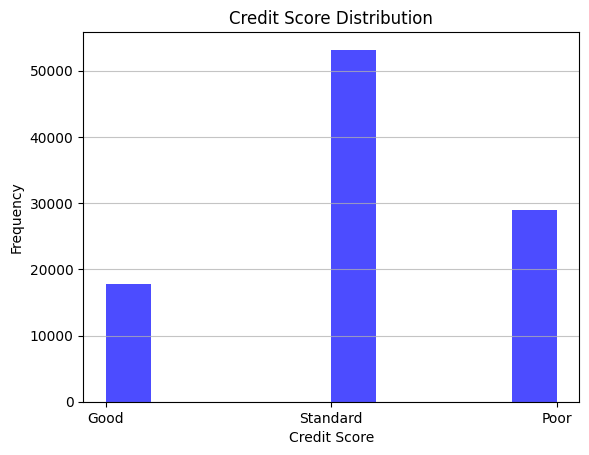

In [212]:
plt.hist(dt_train['Credit_Score'], bins=10, color='blue', alpha=0.7)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


# **check if there any missing values**

In [213]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(dt_train)

,Missing_Number,Missing_Percent
Name,9985,0.09985
ID,0,0.00000
Num_of_Delayed_Payment,0,0.00000
Credit_Score,0,0.00000
Monthly_Balance,0,0.00000
Payment_Behaviour,0,0.00000
Amount_invested_monthly,0,0.00000
Total_EMI_per_month,0,0.00000
Payment_of_Min_Amount,0,0.00000
Credit_Utilization_Ratio,0,0.00000


# **remove** **Outliers**
# calculates the mean and standard deviation. It then identifies outliers in each column based on a range defined by the mean plus or minus 4 times the standard deviation and removes these outliers from the dataset.

In [214]:
df = dt_train.select_dtypes(include='number')
for column in df.columns:
    for i in dt_train["Credit_Score"].unique():
        selected_i = dt_train[dt_train["Credit_Score"] == i]
        selected_column = selected_i[column]

        std = selected_column.std()
        mean= selected_column.mean()

        max = mean + (4 * std)
        min =  mean - (4 * std)

        outliers = selected_column[((selected_i[column] > max) | (selected_i[column] < min))].index
        dt_train.drop(index=outliers, inplace=True)
        # print(column, i, outliers)

In [215]:
dt_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,91434.0,3.331988e+01,1.077402e+01,1.400000e+01,24.000000,33.000000,42.000000,5.600000e+01
Annual_Income,91434.0,5.597368e+04,1.498883e+05,7.005930e+03,19375.760000,37089.860000,71886.540000,6.001316e+06
Monthly_Inhand_Salary,91434.0,4.204250e+03,3.192447e+03,3.036454e+02,1625.165833,3095.941667,5968.127500,2.216350e+04
Num_Bank_Accounts,91434.0,6.242973e+00,1.714115e+01,-1.000000e+00,3.000000,6.000000,7.000000,4.940000e+02
Num_Credit_Card,91434.0,7.643721e+00,2.699309e+01,0.000000e+00,4.000000,5.000000,7.000000,5.500000e+02
Interest_Rate,91434.0,2.117297e+01,9.188011e+01,1.000000e+00,7.000000,13.000000,20.000000,2.077000e+03
Num_of_Loan,91434.0,-4.007153e-01,2.069323e+01,-1.000000e+02,1.000000,3.000000,5.000000,2.510000e+02
Delay_from_due_date,91434.0,2.102880e+01,1.483747e+01,-5.000000e+00,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,91434.0,1.515827e+01,2.155765e+01,0.000000e+00,9.000000,14.000000,19.000000,9.050000e+02
Changed_Credit_Limit,91434.0,1.035539e+01,6.692959e+00,-6.490000e+00,5.400000,9.540000,14.600000,3.697000e+01


# **selection phase**

# **remove un needed column**

In [216]:
dt_train.drop(['Name','ID','Customer_ID','SSN','Month','Type_of_Loan'],axis = 1, inplace = True)
dt_train.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,...,UnKnown,809.98,26.822620,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265.0
1,23,Scientist,19114.12,1592.843333,3,4,3,4,-1,30,...,Good,809.98,31.944960,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,0.0
2,30,Scientist,19114.12,1592.843333,3,4,3,4,3,7,...,Good,809.98,28.609352,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267.0
3,23,Scientist,19114.12,1592.843333,3,4,3,4,5,4,...,Good,809.98,31.377862,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268.0
4,23,Scientist,19114.12,1824.843333,3,4,3,4,6,30,...,Good,809.98,24.797347,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269.0


# check columns data types after cleaning and transformation

In [217]:
# get Numerical Columns
numerical= dt_train.select_dtypes('number').columns

# get Categorical Columns
categorical = dt_train.select_dtypes('object').columns

print(f'Numerical Columns:  {dt_train[numerical].columns}')
print('\n')
print(f'Categorical Columns: {dt_train[categorical].columns}')

Numerical Columns:  Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Credit_History_Age_Months'],
      dtype='object')


Categorical Columns: Index(['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount',
       'Payment_Behaviour', 'Credit_Score'],
      dtype='object')


# **Data Visualization**

# Correlation Heatmap for only Numerical Columns


1. Some features show strong positive correlations the red squares like "Annual_Income" , "Monthly_Inhand_Salary".


2. "Age" and "Credit_Utilization_Ratio" show a slight negative correlation.

3. "Annual_Income" and "Monthly_Inhand_Salary" are strongly correlated, which makes sense as higher annual income leads to higher monthly salary.


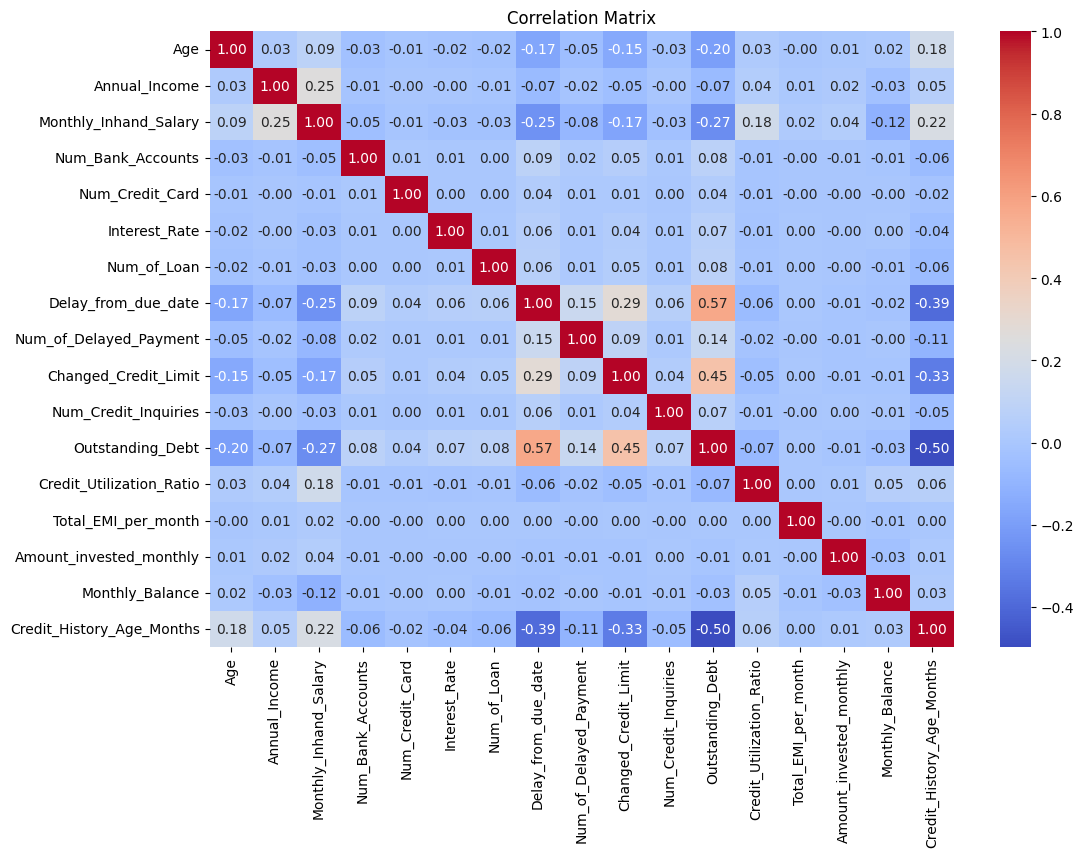

In [218]:
plt.figure(figsize=(12, 8))
correlation_matrix = dt_train[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Credit ScoreDistribution**

---



# The distribution of the Credit_Score values in the dataset is imbalanced

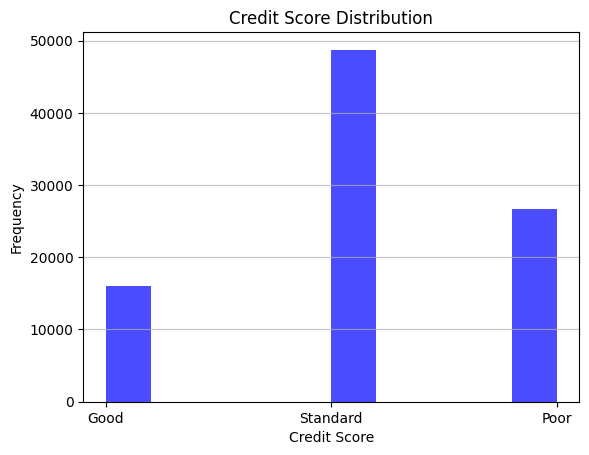

In [219]:
plt.hist(dt_train['Credit_Score'], bins=10, color='blue', alpha=0.7)
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# **Relation between Age and Credit_Score**

Range:

1. Good: the age distribution is wider for those with good credit scores, ranging approximately from the early 20s to above 50 years.
2. Standard: a slightly narrower distribution compared to Good, with most ages concentrated between 30 and 50.
3. Poor: the range is slightly smaller, with fewer outliers, showing that those with poor credit scores have a tighter age distribution.





<ipython-input-220-665b7e89adc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt_train, x='Credit_Score', y='Age', palette='viridis')


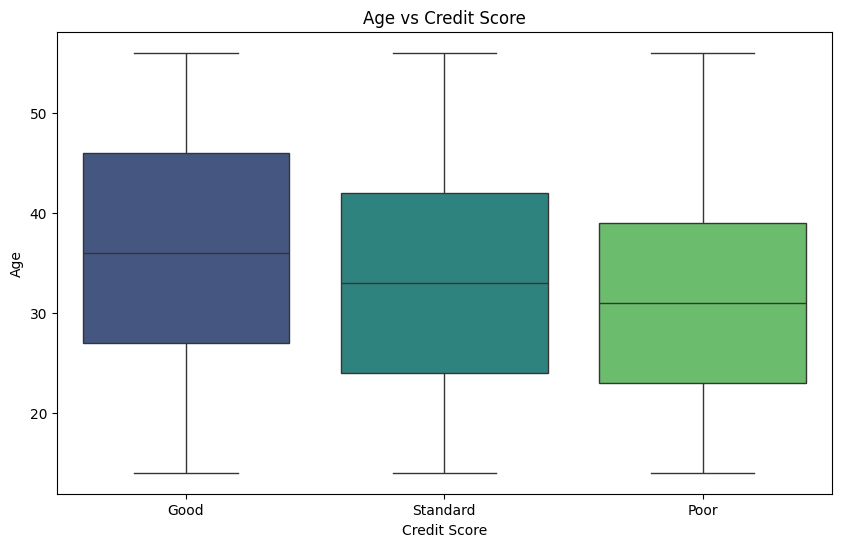

In [220]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dt_train, x='Credit_Score', y='Age', palette='viridis')
plt.title('Age vs Credit Score')
plt.ylabel('Age')
plt.xlabel('Credit Score')
plt.show()




# **Relation between Monthly_Balance and Credit_Score**

1. all three categories (Good, Standard, and Poor) seem to have nearly identical distributions for Monthly_Balance.
2. there is almost no variability in Monthly_Balance for these credit score groups, as seen in the extremely compressed y-axis scale.

<ipython-input-221-cfc0d946aaff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt_train, x='Credit_Score', y='Monthly_Balance', palette='viridis')


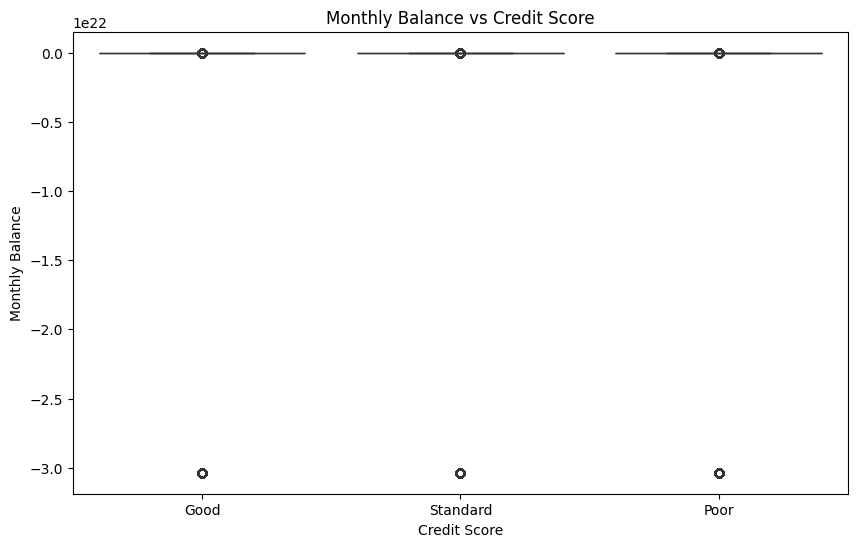

In [221]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dt_train, x='Credit_Score', y='Monthly_Balance', palette='viridis')
plt.title('Monthly Balance vs Credit Score')
plt.ylabel('Monthly Balance')
plt.xlabel('Credit Score')
plt.show()



# **Outstanding_Debt with Credit_Score**

1. Poor: the Outstanding_Debt distribution is wider for those with good credit scores.
2. Standard: a slightly narrower distribution compared to Good. with more outliers
3. Good: the range is slightly smaller, with fewer outliers, showing that those with poor credit scores have a tighter Outstanding_Debt distribution.

<ipython-input-222-3361ce89b4a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dt_train, x='Credit_Score', y='Outstanding_Debt', palette='viridis')


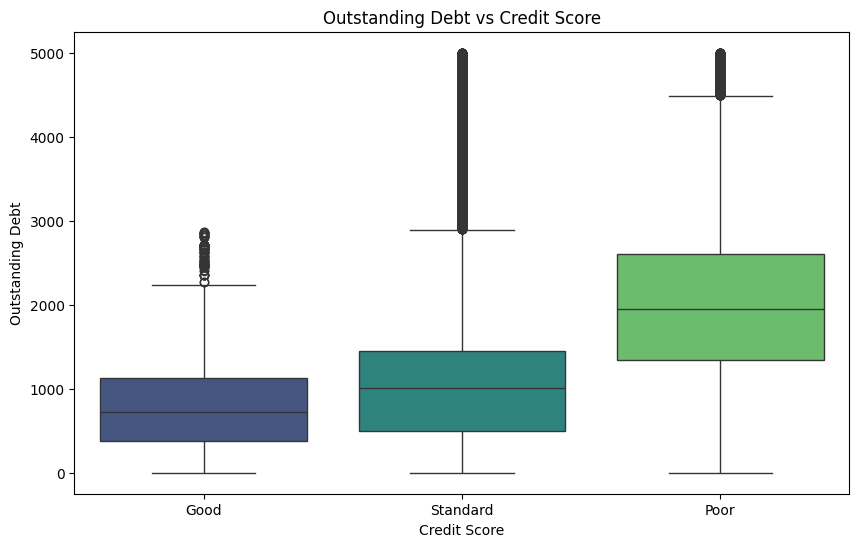

In [222]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dt_train, x='Credit_Score', y='Outstanding_Debt', palette='viridis')
plt.title('Outstanding Debt vs Credit Score')
plt.ylabel('Outstanding Debt')
plt.xlabel('Credit Score')
plt.show()



# **handle object column to be numeric**

In [223]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91434 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        91434 non-null  int64  
 1   Occupation                 91434 non-null  object 
 2   Annual_Income              91434 non-null  float64
 3   Monthly_Inhand_Salary      91434 non-null  float64
 4   Num_Bank_Accounts          91434 non-null  int64  
 5   Num_Credit_Card            91434 non-null  int64  
 6   Interest_Rate              91434 non-null  int64  
 7   Num_of_Loan                91434 non-null  int64  
 8   Delay_from_due_date        91434 non-null  int64  
 9   Num_of_Delayed_Payment     91434 non-null  int64  
 10  Changed_Credit_Limit       91434 non-null  float64
 11  Num_Credit_Inquiries       91434 non-null  float64
 12  Credit_Mix                 91434 non-null  object 
 13  Outstanding_Debt           91434 non-null  float64


# use one hot encoding for Occupation column

In [224]:
#   # One-Hot Encoding
# dt_train = pd.get_dummies(dt_train, columns=['Occupation'], drop_first=True)

# We will use ordinal encoding for the **"Occupation**," **"Payment_of_Min_Amount**," and "**Payment_Behaviour**" features instead of label encoding and one hot encoding. This approach streamlines data handling during deployment, allowing for easier processing of user-entered data without dimensionality issues. Additionally, it preserves any relevant order among the categories, which can enhance model performance.

In [225]:
# Map for Occupation
occupation_map = {
    'Scientist': 1, 'Other': 2, 'Teacher': 3, 'Engineer': 4,
    'Entrepreneur': 5, 'Developer': 6, 'Lawyer': 7, 'Media_Manager': 8,
    'Doctor': 9, 'Journalist': 10, 'Manager': 11, 'Accountant': 12,
    'Musician': 13, 'Mechanic': 14, 'Writer': 15, 'Architect': 16
}
dt_train['Occupation'] = dt_train['Occupation'].map(occupation_map)

In [226]:
# Map for Payment_of_Min_Amount
payment_min_map = {'Yes': 1, 'No': 0, 'NM': -1}
dt_train['Payment_of_Min_Amount'] = dt_train['Payment_of_Min_Amount'].map(payment_min_map)

In [227]:
# Map for Payment_Behaviour
payment_behaviour_map = {
    'Low_spent_Small_value_payments': 0,
    'Low_spent_Medium_value_payments': 1,
    'Low_spent_Large_value_payments': 2,
    'High_spent_Small_value_payments': 3,
    'High_spent_Medium_value_payments': 4,
    'High_spent_Large_value_payments': 5
}
dt_train['Payment_Behaviour'] = dt_train['Payment_Behaviour'].map(payment_behaviour_map)




# Ordinal Encoding for Credit_Mix and for Credit_score

In [228]:
# Ordinal Encoding for Credit_Mix
Credit_Mix_mapping = {'UnKnown': 0, 'Standard': 1, 'Good': 2 ,'Bad': 3 }
dt_train['Credit_Mix'] = dt_train['Credit_Mix'].map(Credit_Mix_mapping)

In [229]:
# Ordinal Encoding for Credit_Score
credit_score_mapping = {'Poor': 0, 'Standard': 1, 'Good': 2}
dt_train['Credit_Score'] = dt_train['Credit_Score'].map(credit_score_mapping)

lable encode for both 'Payment_of_Min_Amount', 'Payment_Behaviour'

In [230]:
# # Label Encoding
# label_enc = LabelEncoder()

# for col in ['Payment_of_Min_Amount', 'Payment_Behaviour']:
#     dt_train[col] = label_enc.fit_transform(dt_train[col])


In [231]:
print(dt_train['Credit_Score'].value_counts())


Credit_Score
1    48736
0    26641
2    16057
Name: count, dtype: int64


In [232]:
# get Numerical Columns
numerical= dt_train.select_dtypes('number').columns

# get Categorical Columns
categorical = dt_train.select_dtypes('object').columns

print(f'Numerical Columns:  {dt_train[numerical].columns}')
print('\n')
print(f'Categorical Columns: {dt_train[categorical].columns}')

Numerical Columns:  Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months'],
      dtype='object')


Categorical Columns: Index([], dtype='object')


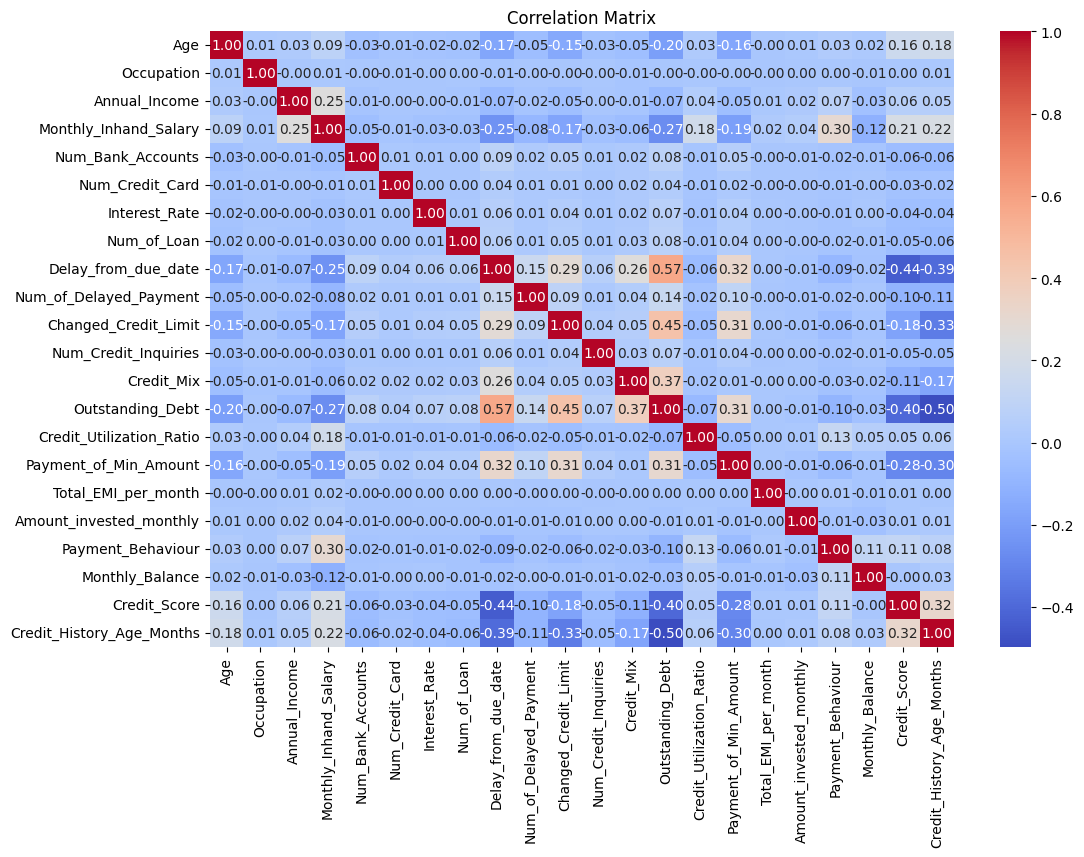

In [233]:
plt.figure(figsize=(12, 8))
correlation_matrix = dt_train[numerical].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#the distribution of the Credit_Score values in your dataset is imbalanced, with the following counts
#Standard    48736
#Poor    26641
#Good    16057
#so we need to increase samples of poor and good

split the data to x and y

In [234]:
X = dt_train.drop(['Credit_Score'], axis=1)
y = dt_train['Credit_Score']

# increase the lowest classes with SMOTE technique

In [235]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [236]:
print(y_resampled.value_counts())


Credit_Score
2    48736
1    48736
0    48736
Name: count, dtype: int64


# split the date to train and test


In [237]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)


In [238]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape :", X_test.shape)
print("y_test shape :", y_test.shape)

X_train shape : (116966, 21)
y_train shape : (116966,)
X_test shape : (29242, 21)
y_test shape : (29242,)


# transform is used on X_test to apply the scaling parameters from X_train, ensuring consistency and avoiding data leakage.

In [239]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **use RandomForestClassifier**

we performed a grid search with cross-validation to find the best hyperparameters for a RandomForestClassifier, explicitly including both default and custom parameter values in the search space. This ensures we optimize the model's performance by systematically testing combinations of key parameters.

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [ 2,5],
    'max_features': ['sqrt', 'log2']
}

# perform grid search with cross-validation
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,
    n_jobs=-1,
    verbose=2
)


In [ ]:
# fit training set to grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [ ]:
#get the best parameters
best_rf_classifier = grid_search.best_estimator_
# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [134]:
rf_classifier = RandomForestClassifier( max_features='sqrt',min_samples_leaf=2, n_estimators=200, random_state=42,class_weight='balanced')

In [135]:
# fit training set to rf_classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=200, random_state=42)

In [101]:
# download the classifier
pickle.dump(rf_classifier, open('model1.pkl', 'wb'))

In [ ]:
from google.colab import files

# Download the saved model file to your local PC
files.download('model1.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
# Evaluate the tuned model on the test set
y_pred_train = rf_classifier.predict(X_train_scaled)
y_pred_test = rf_classifier.predict(X_test_scaled)

In [137]:
# Print accuracy scores
print("Accuracy for Train:", accuracy_score(y_train, y_pred_train))
print()
print("Accuracy for Test:", accuracy_score(y_test, y_pred_test))

Accuracy for Train: 0.9839611511037395

Accuracy for Test: 0.8550372751521784


# **Overfitting**:
# The model likely memorizes patterns in the training data rather than generalizing them effectively for unseen data. This is reflected in the drop in performance on the test set.

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))



Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      9747
           1       0.86      0.76      0.81      9747
           2       0.86      0.95      0.90      9748

    accuracy                           0.86     29242
   macro avg       0.86      0.86      0.86     29242
weighted avg       0.86      0.86      0.86     29242



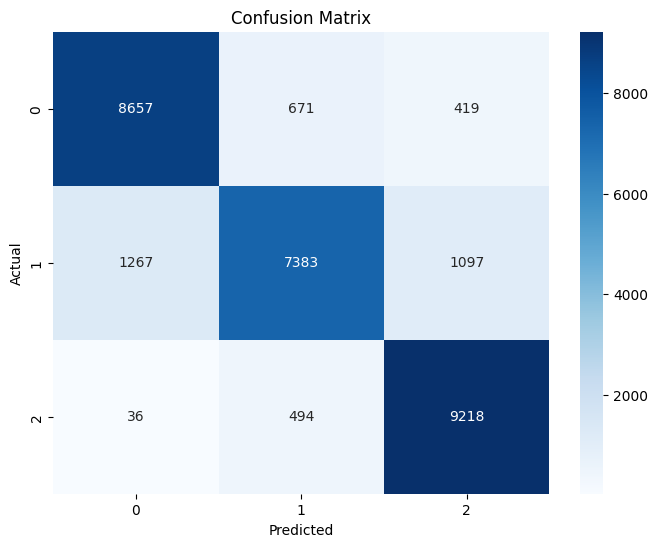

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **try to add class weight**

In [260]:
# adjust the weights to counter class imbalance
class_weights = {0: 5, 1: 1.5, 2: 10.0}
rf_classifier = RandomForestClassifier(
max_features='sqrt',min_samples_leaf=2, n_estimators=200,
    random_state=42, class_weight=class_weights)
# fit training set to rf_classifier
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 5, 1: 1.5, 2: 10.0}, min_samples_leaf=2,
                       n_estimators=200, random_state=42)

In [261]:
# Evaluate the tuned model on the test set
y_pred_train = rf_classifier.predict(X_train_scaled)
y_pred_test = rf_classifier.predict(X_test_scaled)

In [262]:
# Print accuracy scores
print("Accuracy for Train:", accuracy_score(y_train, y_pred_train))
print()
print("Accuracy for Test:", accuracy_score(y_test, y_pred_test))

Accuracy for Train: 0.9536702973513671

Accuracy for Test: 0.8542165378565078



# After adding class weights, the training accuracy decreased slightly from 98.4% to 95.4%, suggesting reduced overfitting. However, test accuracy remained almost the same at 85.5%, indicating no significant impact on the model's generalization ability.

In [263]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))



Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      9747
           1       0.89      0.70      0.78      9747
           2       0.83      0.96      0.89      9748

    accuracy                           0.85     29242
   macro avg       0.86      0.85      0.85     29242
weighted avg       0.86      0.85      0.85     29242



#**RandomForestClassifier**
# test accuracy: 86%
#	Precision, Recall, and F1-score:
1.	Class 0 (Good): Precision = 0.87, Recall = 0.89, F1 = 0.88
2. Class 1 (Standard): Precision = 0.86, Recall = 0.76, F1 = 0.81
3.	Class 2 (Poor): Precision = 0.86, Recall = 0.95, F1 = 0.90

#Confusion Matrix Highlights:
1.	Class 0 has low misclassification compared to other classes.
2.	Class 1 has significant misclassification into both Class 0 and Class 2, indicating it is harder for the model to distinguish.
3.	Class 2 has minimal misclassification, showing high recall and good precision.

#Strengths:
1.	The Random Forest model performs well for Classes 0 and 2.
2. It achieves high precision and recall for Class 2 (Poor), which is often critical in credit scoring contexts.

#Weaknesses:
1.	Class 1 (Standard) is the most problematic, as its recall (0.75) is significantly lower compared to other classes.
2.	Precision for Class 1 is slightly weaker, suggesting the model confuses Standard customers with Good or Poor.






















-

# **XGBClassifier**

In [ ]:
# Initialize XGBoost Classifier
xgb_classifier = XGBClassifier(
    objective='multi:softmax',  # Multi-class classification
    num_class=len(y_train.unique()),  # Number of unique classes
    random_state=42,
    eval_metric='mlogloss')

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, num_parallel_tree=None, ...)

In [ ]:
# make predictions
y_test_pred = xgb_classifier.predict(X_test_scaled)
y_train_pred = xgb_classifier.predict(X_train_scaled)

In [ ]:
import pickle

pickle.dump(xgb_classifier, open('model.pkl', 'wb'))

In [ ]:
# evaluate the classifier
print("Accuracy on train set:", accuracy_score(y_train, y_train_pred))
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy on train set: 0.8469726245233657
Accuracy: 0.810922645509883


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      9747
           1       0.79      0.71      0.75      9747
           2       0.81      0.91      0.86      9748

    accuracy                           0.81     29242
   macro avg       0.81      0.81      0.81     29242
weighted avg       0.81      0.81      0.81     29242



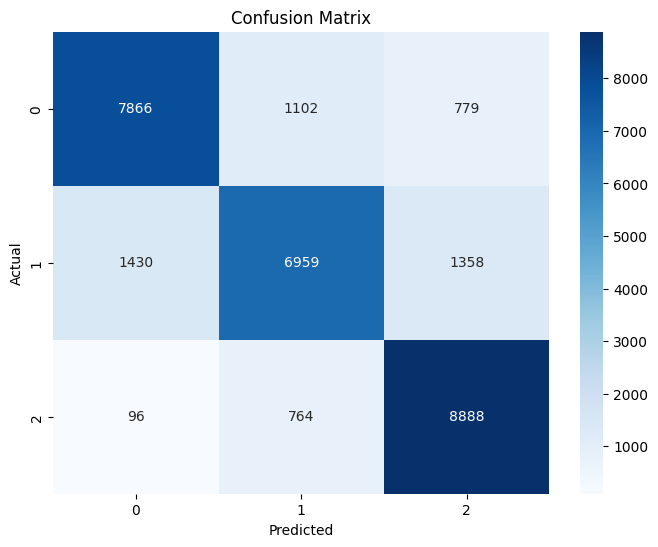

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=xgb_classifier.classes_, yticklabels=xgb_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


#**XGBoost Classifier**
#Accuracy: 81%
#	Precision, Recall, and F1-score:
1.	Class 0 (Good): Precision = 0.84, Recall = 0.81, F1 = 0.82
2.	Class 1 (Standard): Precision = 0.78, Recall = 0.72, F1 = 0.75
3.	Class 2 (Poor): Precision = 0.91, Recall = 0.91, F1 = 0.86

#	Confusion Matrix Highlights:
1.	Class 0 has moderate misclassification into Class 1.
2. Class 1 shows relatively high confusion, with significant misclassification into Classes 0 and 2.
3.	Class 2 has strong precision and recall, indicating effective differentiation of "Poor" credit scores.

#Strengths:
1.	XGBoost handles Class 2 (Poor) particularly well with excellent precision and recall, similar to Random Forest.
2.	Class 0 (Good) also has reasonable performance.

#Weaknesses:
1.	XGBoost struggles more than Random Forest with Class 1 (Standard), evidenced by lower precision, recall, and F1.
2.	Overall accuracy is 5% lower than Random Forest.


# **use deep learning techniques**

In [ ]:
tf.random.set_seed(42)
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(256, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])
model.compile(optimizer = Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           5,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,195 (907.01 KB)

 Trainable params: 230,019 (898.51 KB)

 Non-trainable params: 2,176 (8.50 KB)

In [ ]:
model.fit(x=X_train_scaled,
          y=y_train,
          validation_data=(X_test_scaled, y_test),
          batch_size=512,
          epochs=100,
          verbose=1
          )

Epoch 1/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7495 - loss: 0.6008 - val_accuracy: 0.7541 - val_loss: 0.5941
Epoch 2/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7504 - loss: 0.6018 - val_accuracy: 0.7534 - val_loss: 0.5928
Epoch 3/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.7494 - loss: 0.6022 - val_accuracy: 0.7560 - val_loss: 0.5897
Epoch 4/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7523 - loss: 0.5979 - val_accuracy: 0.7561 - val_loss: 0.5870
Epoch 5/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7510 - loss: 0.5977 - val_accuracy: 0.7571 - val_loss: 0.5852
Epoch 6/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.7513 - loss: 0.5952 - val_accuracy: 0.7563 - val_loss: 0.5852
Epoch 7/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7519 - loss: 0.5933 - val_accuracy: 0.7581 - val_loss: 0.5835
Epoch 8/100
229/229 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.7558 - loss: 0.5901 

In [ ]:
# evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')

# predictions
predictions = model.predict(X_test_scaled)
predicted_classes = np.argmax(predictions, axis=1)  # class with the highest probability

914/914 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7945 - loss: 0.5085
Test Accuracy: 0.7949
914/914 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
# classification report
report = classification_report(y_test, predicted_classes)
print("Classification Report:\n", report)




Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82      9747
           1       0.78      0.64      0.70      9747
           2       0.80      0.91      0.85      9748

    accuracy                           0.79     29242
   macro avg       0.79      0.79      0.79     29242
weighted avg       0.79      0.79      0.79     29242



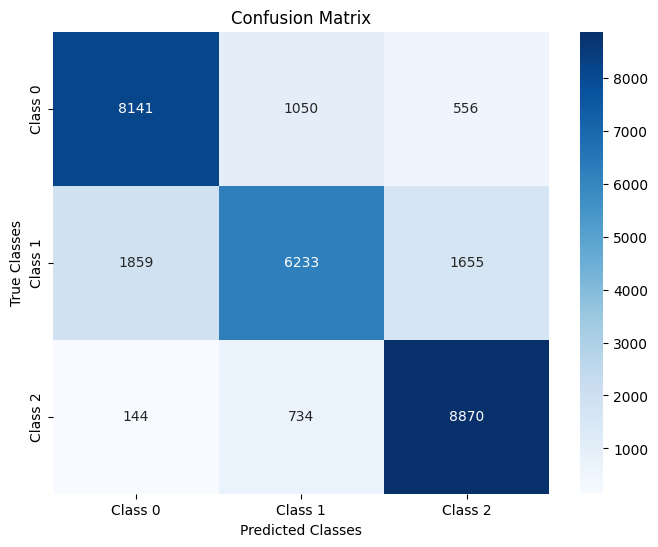

In [ ]:
#  confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

#**Deep Learning Model**
# Accuracy: 79%

#Precision, Recall, and F1-score:

1. Class 0 (Good): Precision = 0.80, Recall = 0.84, F1 = 0.82
2. Class 1 (Standard): Precision = 0.78, Recall = 0.64, F1 = 0.70
3. Class 2 (Poor): Precision = 0.80, Recall = 0.91, F1 = 0.85

# Confusion Matrix Highlights:

1.Class 0 (Good): Moderate misclassification into Class 1. The model performs fairly well in predicting "Good" credit scores, with a strong precision of 0.80 and recall of 0.84.
2.Class 1 (Standard): The model has challenges with Class 1, as it misclassifies a considerable number of instances into both Class 0 and Class 2. This is evident in the lower recall (0.64) and F1-score (0.70).
3.Class 2 (Poor): Class 2 ("Poor" credit scores) is predicted with high accuracy, with strong precision (0.80) and recall (0.91), indicating the model can distinguish "Poor" credit scores effectively.

#Strengths:

1.Class 2 (Poor): The model is very effective in identifying "Poor" credit scores, with a precision of 0.80 and a very high recall of 0.91, which is a key strength.

2. Class 0 (Good): The performance of Class 0 is also good, with solid precision and recall scores, showing the model's ability to identify "Good" credit scores.

#Weaknesses:

1.Class 1 (Standard): The model's performance on Class 1 (Standard) is weaker. It has lower precision and recall, which indicates that the model struggles with this class, misclassifying it into both Class 0 and Class 2.
